In [1]:
import random
import torch

import os
from matplotlib import pyplot as plt
from diffusion_modules.diffusion import Diffusion
from diffusion_modules.utils import plot_images, test_save_images, make_stroke, stroke_to_char
from diffusion_models.utils import UNet

In [2]:
num_classes = 420
input_length = 1
contents_dim = 100
input_size = 64
mode = "random"
folder_name ="test1"

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = str(0)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
PATH = "C:/Users/gih54/Desktop/diffusion/ckpt_290.pt"
model = UNet().to(device)
ckpt = torch.load(PATH)
model.load_state_dict(ckpt)

<All keys matched successfully>

In [4]:
diffusion = Diffusion(first_beta=1e-4,
                      end_beta=0.02,
                      noise_step=1000,
                      beta_schedule_type='linear',
                      img_size=input_size,
                      device=device)

### test ###

In [5]:
def make_stroke(contents):
    strokes_list = []
    for content in contents:
        content_code = ord(content)
        first_letter_code = 44032
        stroke = [0] * 68
        first_consonant_letter = int((content_code - first_letter_code) / 588)
        middle_consonant_letter = int(((content_code - first_letter_code) - (first_consonant_letter * 588)) / 28)
        last_consonant_letter = int((content_code - first_letter_code) - (first_consonant_letter * 588) - (middle_consonant_letter * 28))
        stroke[first_consonant_letter] = 1
        stroke[middle_consonant_letter + 19] = 1
        stroke[last_consonant_letter + 19 + 21] = 1
        strokes_list.append(stroke)
    return strokes_list

In [22]:
input_string = ['감']
input_length = len(input_string)
print(input_length)

1


In [23]:
strokes = make_stroke(input_string)
strokes = torch.Tensor(strokes)
print(len(strokes))
print(strokes.shape)

1
torch.Size([1, 68])


In [24]:
style_emb = torch.zeros(input_length, 12288)
contents_emb = torch.zeros(input_length, contents_dim)

In [25]:
y = torch.cat([contents_emb, strokes, style_emb], dim=1).to(device)
x = diffusion.test_sampling(model,len(strokes), y, cfg_scale=3)

sampling: 100%|██████████| 999/999 [00:53<00:00, 18.77it/s]


In [26]:
print(len(x))

1


In [13]:
from PIL import Image
from io import BytesIO

In [14]:
bytesio = BytesIO()

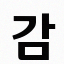

In [39]:
im = Image.fromarray(x[0].permute(1,2,0).cpu().numpy())
im

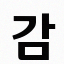

In [42]:
im.save('감', 'png')
im

In [41]:
im.format_description

In [30]:
tmp = bytesio.getvalue()


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00@\x00\x00\x00@\x08\x02\x00\x00\x00%\x0b\xe6\x89\x00\x00\x12\xbcIDATx\x9cmZK\xccvWU~\x9e\xb5\xcf\xfb\xf5\xbf\xf6b\x08D\x12\x89\xa6J\t\x05\n\xa5Pn\x82NL0\n^\xc2L\x11\xac\x11\x135!\xc6\xa0\x86h\x8c#\x89\xd1\t1\xa00!*\x02q\xe0\xc8Kt`L`\xc0D\xc1\x1a\xac\x021h\xb8\xb7\x12\xa0\x94\xff{\xf7z\x1e\x07k\xed\xf3\xbe\x7f\xf5\xb4\xc9\xff\x9d\xf3\x9e\xb3\xf7\xda\xeb\xfa\xac\x0bmYd\xa0.\x1b$\xe0\xbe\xeb\x9b$\xea\x05\x1a\x02\x82x\xda\x95\x82\x03[-\x00\x80\x94\x91\xc4\x01k-\xc20\xc1ZV\xb4\x8dA\xc2\x10\x01 \x0cp\xed\n\x18\xa0\x00\xb2\xbe\x91\x11\x80\x00&\x10\x93Q[\x19\xa4$\x1a\nF\x02\xe3\xb4\x82\x80\x10E\x04!#\x08\xd8IF\xed#!\xd6\xa1\x05\x04\x0c\xd0\x80\x81X\xef\xaf\xb3iD\xa40\x08\x10\x13\xd8N\xe7\x86\x06\x02\xa7K\x00\xfct\x06I@ \x00X"i\xda\x8e\x10@ @"\x18\t\x0f\xc0@\x02&\xcc\x00\x11\x08CS\xb5\xa0\xc9\xa1\xe6R=\xf2\xbe\x87A%X|2i\x01\x980\x80\x11\x01\x8b\x81\x94al\x90[\xd4\xf2\x00a\xc0y\xb6V\xf0\xb4,\xe0K(\xc2\xe1\x84\x91\x8c\x00\tDpf\x00\x01\x04\x04\x19\x1